In [177]:
import os.path as osp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datetime import timedelta

## Load data

In [145]:
# Households
base_solar = osp.join('useful_solar', 'run_household_solar_1')
grid = osp.join(base_solar, 'gridbalance2016.csv')
solar = osp.join(base_solar, 'power2016_solar_module.csv')
household = osp.join(base_solar, 'power2016Household.csv')
griddata = pd.read_csv(grid, index_col=0)
solardata = pd.read_csv(solar)
householddata = pd.read_csv(household)

In [52]:
griddata.head(3)

,Time,Power from grid,Power into grid
0,0.000000,0.0,0.0
1,0.016667,0.0,0.0
2,0.033333,0.0,0.0


In [53]:
solardata

,Unnamed: 0,Time,Power consumed,Solar Power used
0,0,0.000000,0.0,0.0
1,1,0.016667,0.0,0.0
2,2,0.033333,0.0,0.0
3,3,0.050000,0.0,0.0
4,4,0.066667,0.0,0.0
5,5,0.083333,0.0,0.0
6,6,0.100000,0.0,0.0
7,7,0.116667,0.0,0.0
8,8,0.133333,0.0,0.0
9,9,0.150000,0.0,0.0


In [51]:
griddata['Power into grid'][:3000] + solardata['Solar Power used'][:3000]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
       ... 
2970    0.0
2971    0.0
2972    0.0
2973    0.0
2974    0.0
2975    0.0
2976    0.0
2977    0.0
2978    0.0
2979    0.0
2980    0.0
2981    0.0
2982    0.0
2983    0.0
2984    0.0
2985    0.0
2986    0.0
2987    0.0
2988    0.0
2989    0.0
2990    0.0
2991    0.0
2992    0.0
2993    0.0
2994    0.0
2995    0.0
2996    0.0
2997    0.0
2998    0.0
2999    0.0
Length: 3000, dtype: float64

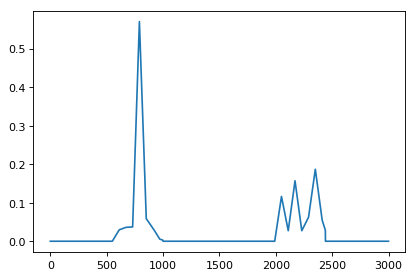

In [146]:
plt.figure(figsize=(6, 4), dpi=80)
total = griddata['Power into grid'][:3000] + solardata['Solar Power used'][:3000]
total.plot()
plt.show()

In [14]:
dt = [datetime(2016, 1, 1)]
for _ in range(len(total)-1): 
    dt.append(dt[-1] + timedelta(seconds=60))

total = total.to_frame()
total['date'] = dt

In [16]:
total.set_index('date', drop=True, inplace=True)
total = total.resample('H').mean()

In [21]:
total.columns = ['PowerProduced']

In [22]:
total

,PowerProduced
date,
2016-01-01 00:00:00,0.000000
2016-01-01 01:00:00,0.000000
2016-01-01 02:00:00,0.000000
2016-01-01 03:00:00,0.000000
2016-01-01 04:00:00,0.000000
2016-01-01 05:00:00,0.000000
2016-01-01 06:00:00,0.000000
2016-01-01 07:00:00,0.000000
2016-01-01 08:00:00,0.000000


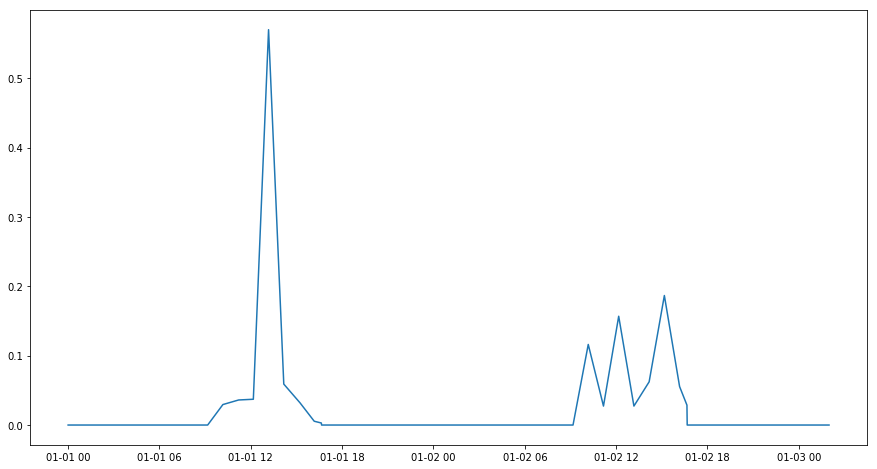

In [101]:
plt.figure(figsize=(15, 8))
plt.plot(total['date'], total[0])

In [54]:
solardata = pd.read_csv(household)

In [59]:
(solardata['Power consumed']/60).sum()

1463.5046774833334

In [219]:
weather = pd.read_csv("Weather-AMS/Climate240.csv", usecols=[1, 2, 5, 9, 10], skiprows=27, parse_dates=[1])[:8784]

In [220]:
weather.head(3)

,Local [],Irradiation [W/m^2],Wind [m/s],Diffuse [W/m^2],Direct [W/m^2]
0,0000-01-01 00:30:00,0,5.528,0,0
1,0000-01-01 01:30:00,0,5.487,0,0
2,0000-01-01 02:30:00,0,5.659,0,0


In [221]:
weather.columns = ['Local', 'Irradiation', 'Wind', 'Diffuse', 'Direct']
# weather = weather[~weather.Local.isna()]

In [222]:
weather.set_index('Local', inplace=True, drop=True)

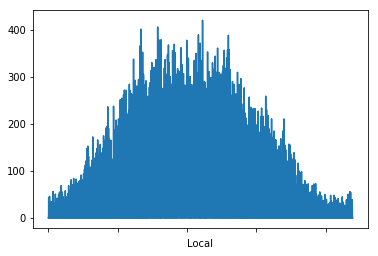

In [223]:
pd.to_numeric(weather.Direct, errors='coerce').plot()

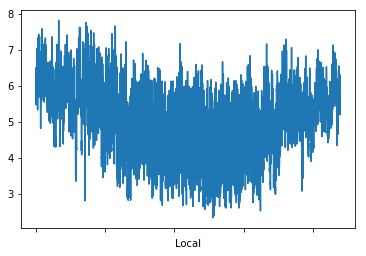

In [224]:
pd.to_numeric(weather.Wind, errors='coerce').plot()

In [225]:
cols = ['Irradiation', 'Wind', 'Diffuse', 'Direct']

In [226]:
for i in cols:
    weather[i] = pd.to_numeric(weather[i])

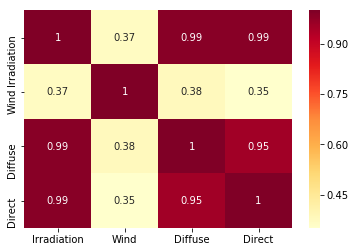

In [244]:
sns.heatmap(weather[cols].corr(), annot=True, cmap='YlOrRd')

In [246]:
weather.resample('H').mean()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

## All users

In [58]:
import glob

In [ ]:
# Households
base_solar = osp.join('useful_solar', 'run_household_solar_1')
grid = osp.join(base_solar, 'gridbalance2016.csv')
solar = osp.join(base_solar, 'power2016_solar_module.csv')
household = osp.join(base_solar, 'power2016Household.csv')
griddata = pd.read_csv(grid, index_col=0)
solardata = pd.read_csv(solar)
householddata = pd.read_csv(household)

In [106]:
type(ttt)

pandas.core.frame.DataFrame

In [151]:
# Read all folders and load the power consumption of all households into one frame
dfs = []
for p in glob.glob('useful_solar/*'):
    household = pd.read_csv(osp.join(p, 'power2016Household.csv'), usecols=[0, 2], index_col=0)
    dfs.append(household.rename(columns={'Power consumed': 'consumed_h' + p.split('_')[-1]}))

dfs = pd.concat(dfs, axis=1)

In [152]:
dfs.head(3)

,consumed_h1,consumed_h10,consumed_h11,consumed_h12,consumed_h13,consumed_h14,consumed_h15,consumed_h16,consumed_h17,consumed_h18,consumed_h19,consumed_h2,consumed_h20,consumed_h3,consumed_h4,consumed_h5,consumed_h6,consumed_h7,consumed_h8,consumed_h9
0,0.0,0.297506,0.0,0.0,0.0,0.113361,0.0,0.200069,0.929669,0.0,0.264872,0.0,0.0,0.4,0.0,0.769379,0.4,0.0,0.0,0.321239
1,0.0,0.297506,0.0,0.0,0.0,0.113361,0.0,0.200069,0.929669,0.0,0.264872,0.0,0.0,0.4,0.0,0.769379,0.4,0.0,0.0,0.321239
2,0.0,0.297506,0.0,0.0,0.0,0.113361,0.0,0.516962,0.929669,0.0,0.264872,0.0,0.0,0.4,0.0,0.769379,0.4,0.0,0.0,0.321239


In [153]:
dt = [datetime(2016, 1, 1)]
for _ in range(len(dfs)-1): 
    dt.append(dt[-1] + timedelta(seconds=60))

dfs['Date'] = dt

In [154]:
dfs

,consumed_h1,consumed_h10,consumed_h11,consumed_h12,consumed_h13,consumed_h14,consumed_h15,consumed_h16,consumed_h17,consumed_h18,...,consumed_h2,consumed_h20,consumed_h3,consumed_h4,consumed_h5,consumed_h6,consumed_h7,consumed_h8,consumed_h9,Date
0,0.000000,0.297506,0.000000,0.0,0.000000,0.113361,0.0,0.200069,0.929669,0.000000,...,0.0,0.0,0.400000,0.000000,0.769379,0.40000,0.000000,0.000000,0.321239,2016-01-01 00:00:00
1,0.000000,0.297506,0.000000,0.0,0.000000,0.113361,0.0,0.200069,0.929669,0.000000,...,0.0,0.0,0.400000,0.000000,0.769379,0.40000,0.000000,0.000000,0.321239,2016-01-01 00:01:00
2,0.000000,0.297506,0.000000,0.0,0.000000,0.113361,0.0,0.516962,0.929669,0.000000,...,0.0,0.0,0.400000,0.000000,0.769379,0.40000,0.000000,0.000000,0.321239,2016-01-01 00:02:00
3,0.000000,0.000000,0.000000,0.0,0.000000,0.113361,0.0,0.516962,0.929669,0.000000,...,0.0,0.0,0.400000,0.000000,0.769379,0.40000,0.000000,0.084943,0.321239,2016-01-01 00:03:00
4,0.000000,0.000000,0.000000,0.0,0.000000,0.113361,0.0,0.516962,0.929669,0.000000,...,0.0,0.0,0.400000,0.000000,0.769379,0.40000,0.000000,0.084943,0.321239,2016-01-01 00:04:00
5,0.000000,0.000000,0.000000,0.0,0.000000,0.113361,0.0,0.516962,0.929669,0.000000,...,0.0,0.0,0.400000,0.000000,0.769379,0.40000,0.000000,0.084943,0.321239,2016-01-01 00:05:00
6,0.000000,0.000000,0.000000,0.0,0.000000,0.113361,0.0,0.516962,0.929669,0.000000,...,0.0,0.0,0.400000,0.000000,0.423992,0.40000,0.000000,0.084943,0.119082,2016-01-01 00:06:00
7,0.000000,0.000000,0.000000,0.0,0.000000,0.113361,0.0,0.516962,0.929669,0.000000,...,0.0,0.0,0.400000,0.000000,0.423992,0.40000,0.000000,0.084943,0.119082,2016-01-01 00:07:00
8,0.000000,0.000000,0.000000,0.0,0.000000,0.113361,0.0,0.516962,0.929669,0.000000,...,0.0,0.0,0.400000,0.000000,0.423992,0.40000,0.000000,0.084943,0.119082,2016-01-01 00:08:00
9,0.000000,0.000000,0.000000,0.0,0.000000,0.113361,0.0,0.516962,0.929669,0.000000,...,0.0,0.0,0.400000,0.000000,0.423992,0.40000,0.000000,0.084943,0.119082,2016-01-01 00:09:00


In [253]:
# dfs.set_index('Date', drop=True, inplace=True)
dfs = dfs.resample('H').mean()

In [255]:
dfs

,consumed_h1,consumed_h10,consumed_h11,consumed_h12,consumed_h13,consumed_h14,consumed_h15,consumed_h16,consumed_h17,consumed_h18,consumed_h19,consumed_h2,consumed_h20,consumed_h3,consumed_h4,consumed_h5,consumed_h6,consumed_h7,consumed_h8,consumed_h9
Date,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,0.063509,0.074376,0.055113,0.055133,0.041821,0.070976,0.049510,0.258166,2.193508,0.051576,0.083876,0.022100,0.048513,0.255146,0.090316,0.527900,0.361613,0.147836,0.012741,0.044032
2016-01-01 01:00:00,0.052924,0.044626,0.055113,0.020048,0.038019,0.016185,0.059412,0.263448,1.769219,0.068768,0.052974,0.008840,0.026462,0.102579,0.085887,0.436551,0.028280,0.131515,0.014157,0.040431
2016-01-01 02:00:00,0.052924,0.004958,0.055113,0.045109,0.045623,0.017804,0.044559,0.066154,0.283120,0.057306,0.052974,0.035360,0.026462,0.081354,0.075878,0.106365,0.031422,0.131515,0.014157,0.030324
2016-01-01 03:00:00,0.063509,0.039667,0.060624,0.035085,0.045623,0.008093,0.044559,0.052816,0.125123,0.063037,0.013244,0.008840,0.044103,0.091026,0.080306,0.094852,0.018853,0.138430,0.015573,0.033693
2016-01-01 04:00:00,0.026462,0.069418,0.049601,0.055133,0.049425,0.118752,0.044559,0.058097,0.119255,0.057306,0.039731,0.015470,0.057334,0.082186,0.168475,0.138997,0.043990,0.057940,0.505252,0.033693
2016-01-01 05:00:00,0.031754,0.049584,0.066135,0.055133,0.034217,0.131165,0.064363,0.058097,0.103441,0.675832,0.044145,0.026520,0.039693,0.104111,0.350849,0.138447,0.006284,0.124600,0.721734,0.037062
2016-01-01 06:00:00,0.075087,0.080811,0.367831,0.096312,0.064733,0.157328,0.094486,0.086307,0.097017,0.818589,0.096837,0.055780,0.076963,0.132402,0.469299,0.808318,0.099798,0.220714,0.350092,0.078754
2016-01-01 07:00:00,0.068266,0.170533,0.385280,0.119852,0.431699,0.161124,0.081916,0.262001,0.309711,0.779683,0.259851,0.689453,0.209778,0.720303,0.463353,0.844549,0.389089,0.178480,0.227869,0.181562
2016-01-01 08:00:00,0.093877,0.712457,0.258320,0.312817,0.338672,0.161684,0.500596,0.321829,0.999753,0.334964,0.204328,0.282649,0.259930,0.503999,0.475786,1.114606,0.657110,0.576304,0.195798,0.341965


## Cloud data